In [1]:
from utils import *
import openxdf
import pandas as pd
import numpy as np
import pandas as pd
import os
import time

In [2]:
def get_epochs(signal,channels, staging_df, label):
    signals_dict = {}
    L = set(staging_df[label])
    for epoch in L:
        start = (epoch - 1) * 30
        end = start + 30
        period = signal.read_file(channels, start, end)
        for channel in channels:
            period[channel] = np.ravel(period[channel])
        signals_dict[epoch] = period
    return signals_dict

def plot_epochO(epoch,signals_dict, scoring_df): #removed first arg, epoch
    plot_signals = {}
    for channel in signals_dict.keys():
        plot_signals[channel] = select_epoch(epoch, channel, signals_dict)

    ## Plot channels
    fig, ax = plt.subplots(1)
    min_point, max_point = 0, 0
    for key in plot_signals.keys():
        len_key = len(plot_signals[key])
        x_time_axis = [i / (len_key / 30) for i in range(0, len_key)]
        min_point = min(min_point, np.min(plot_signals[key]))
        max_point = max(max_point, np.max(plot_signals[key]))
        ax.plot(x_time_axis, plot_signals[key], label=key)
        ax.legend()

    ## Add event annotations
    events = scoring_df[scoring_df["EpochNumber"] == epoch]
    if not events.size:
        return plt.show()

    for indx, row in events.iterrows():
        if row["CEName"] == "RSWA_P":
            ax.axvline(x=row["EpochTime"], linestyle="--", color="black")

        if row["CEName"] == "RSWA_T":
            x_start = float(row["EpochTime"])
            y_start = min_point
            width = float(row["Duration"])
            height = max_point - min_point
            rect = Rectangle((x_start, y_start), width, height, linewidth=1, fill=True, alpha=0.5, facecolor="grey")
            ax.add_patch(rect)

    return plt.show()

def select_epoch(epoch, channel, signals_dict):
    start = (epoch - 1) * 30
    end = start + 30
    period = signals_dict[channel][start:end]
    return np.concatenate(period)
    
def plot_epoch(epoch, signals_dict, scoring_df):
    plot_signals = {}
    for channel in signals_dict.keys():
        plot_signals[channel] = signals_dict[channel]
        #plot_signals[channel] = select_epoch(epoch, channel, signals_dict)

    ## Plot channels
    fig, ax = plt.subplots(1)
    min_point, max_point = 0, 0
    for key in plot_signals.keys():
        len_key = len(plot_signals[key])
        x_time_axis = [i / (len_key / 30) for i in range(0, len_key)]
        min_point = min(min_point, np.min(plot_signals[key]))
        max_point = max(max_point, np.max(plot_signals[key]))
        ax.plot(x_time_axis, plot_signals[key], label=key)
        ax.legend()

    ## Add event annotations
    events = scoring_df[scoring_df["EpochNumber"] == epoch]
    if not events.size:
        return plt.show()

    for indx, row in events.iterrows():
        if row["CEName"] == "RSWA_P":
            ax.axvline(x=row["EpochTime"], linestyle="--", color="black")

        if row["CEName"] == "RSWA_T":
            x_start = float(row["EpochTime"])
            y_start = min_point
            width = float(row["Duration"])
            height = max_point - min_point
            rect = Rectangle((x_start, y_start), width, height, linewidth=1, fill=True, alpha=0.5, facecolor="grey")
            ax.add_patch(rect)

    return plt.show()

def plot_many_epochs(big_signals_dict, scoring_df):
    fig_num = 0
    for key in big_signals_dict.keys():
        plt.figure(fig_num)
        fig_num += 1
        plot_epoch(key,big_signals_dict[key],scoring_df)


In [3]:
data_dir = "RSWA_XDF/"
xdf_ext = '.xdf'
data_ext = '.nkamp'

files_control = [os.path.join('control', f[:-4]) for f in os.listdir(os.path.join(data_dir, 'control')) if f.endswith('xdf')]
files_random = [os.path.join('random', f[:-4]) for f in os.listdir(os.path.join(data_dir, 'random')) if f.endswith('xdf')]
files_rswa = [os.path.join('rswa', f[:-4]) for f in os.listdir(os.path.join(data_dir, 'rswa')) if f.endswith('xdf')]

test_rec = os.path.join(data_dir, files_control[0])

In [4]:
xdf, signal = load_data(test_rec + xdf_ext, test_rec + data_ext)

<Figure size 432x288 with 0 Axes>

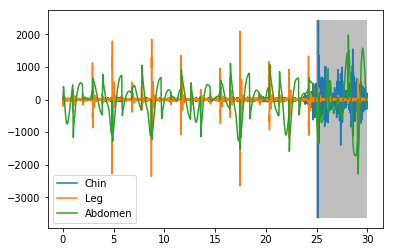

<Figure size 432x288 with 0 Axes>

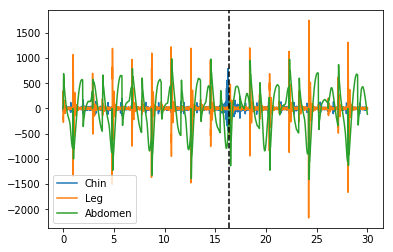

In [5]:
rswa_events = select_rswa_events(signal)
rswa_epochs = get_epochs(signal,["Chin", "Leg", "Abdomen"], rswa_events, "EpochNumber")
plot_many_epochs(rswa_epochs, rswa_events)

<Figure size 432x288 with 0 Axes>

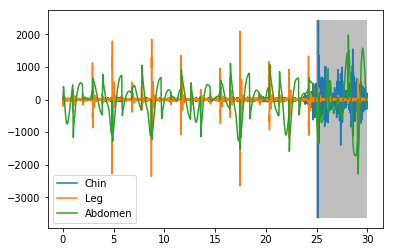

<Figure size 432x288 with 0 Axes>

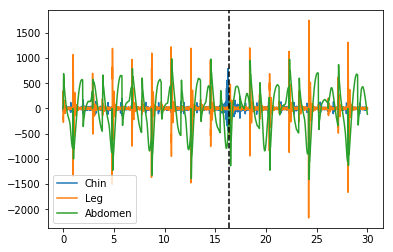

<Figure size 432x288 with 0 Axes>

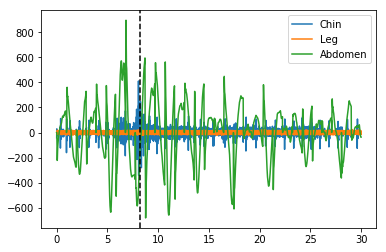

<Figure size 432x288 with 0 Axes>

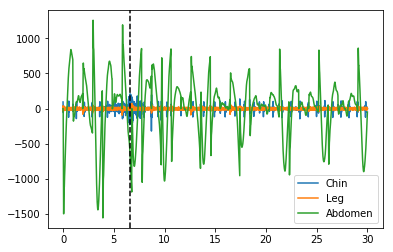

<Figure size 432x288 with 0 Axes>

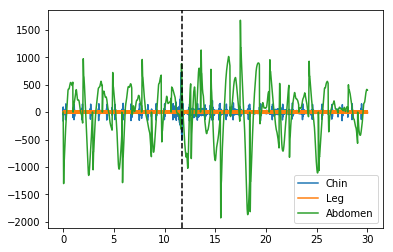

<Figure size 432x288 with 0 Axes>

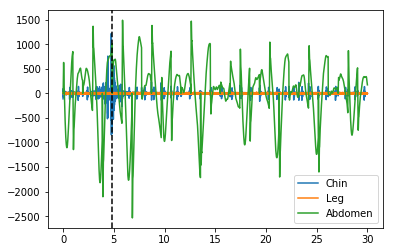

<Figure size 432x288 with 0 Axes>

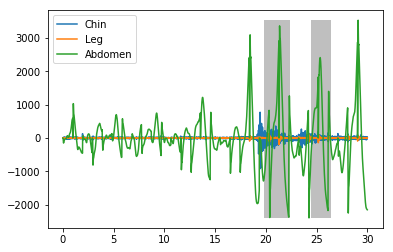

<Figure size 432x288 with 0 Axes>

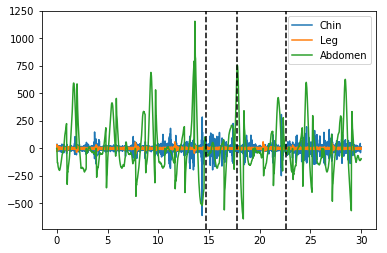

<Figure size 432x288 with 0 Axes>

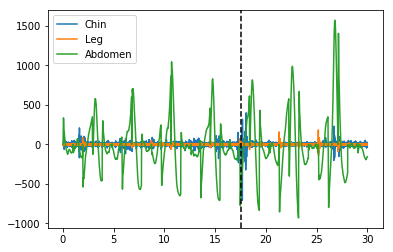

<Figure size 432x288 with 0 Axes>

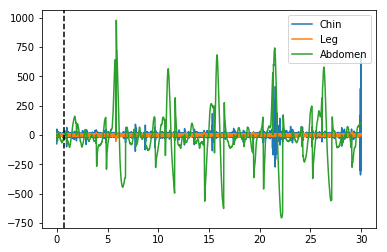

<Figure size 432x288 with 0 Axes>

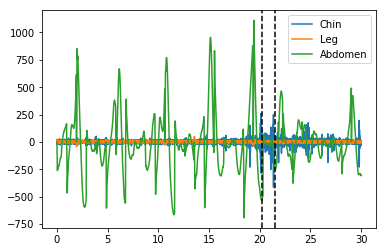

<Figure size 432x288 with 0 Axes>

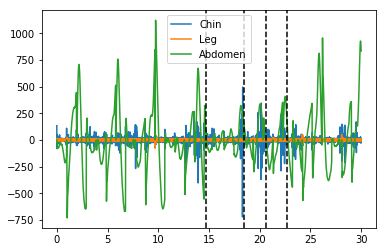

<Figure size 432x288 with 0 Axes>

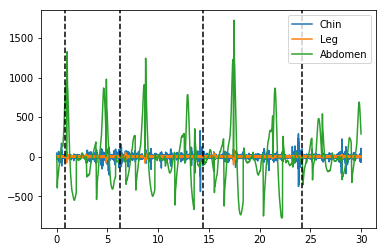

<Figure size 432x288 with 0 Axes>

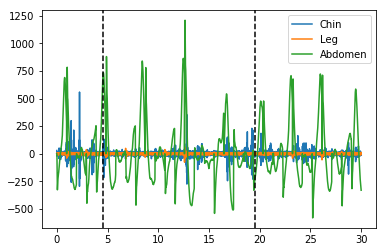

<Figure size 432x288 with 0 Axes>

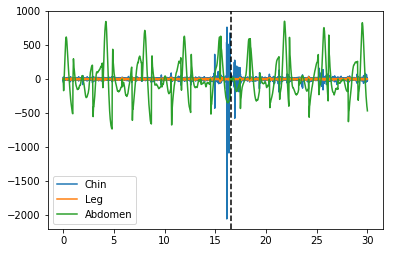

<Figure size 432x288 with 0 Axes>

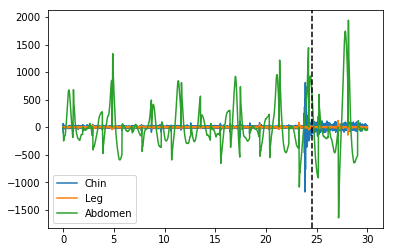

<Figure size 432x288 with 0 Axes>

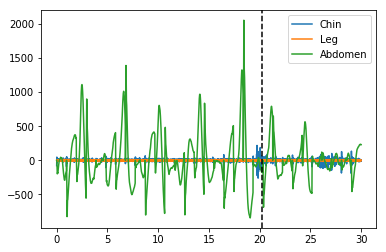

<Figure size 432x288 with 0 Axes>

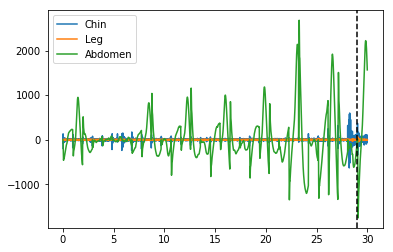

<Figure size 432x288 with 0 Axes>

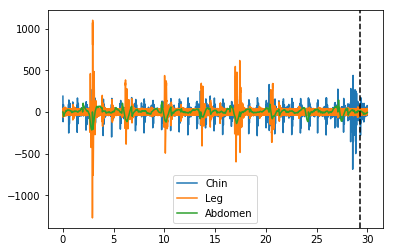

<Figure size 432x288 with 0 Axes>

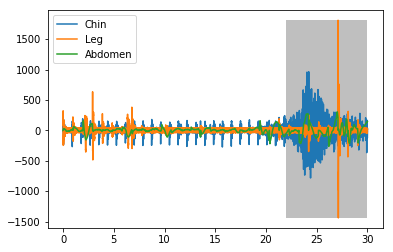

<Figure size 432x288 with 0 Axes>

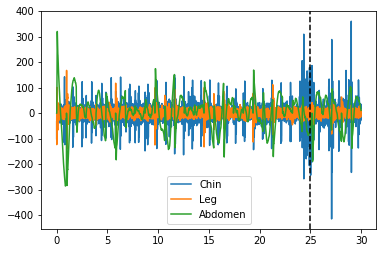

<Figure size 432x288 with 0 Axes>

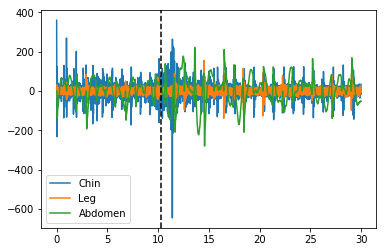

<Figure size 432x288 with 0 Axes>

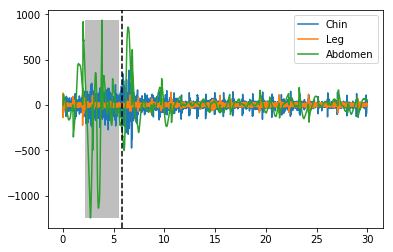

<Figure size 432x288 with 0 Axes>

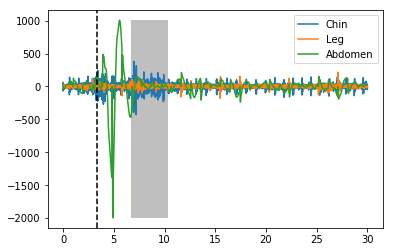

<Figure size 432x288 with 0 Axes>

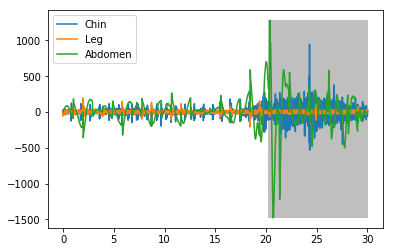

<Figure size 432x288 with 0 Axes>

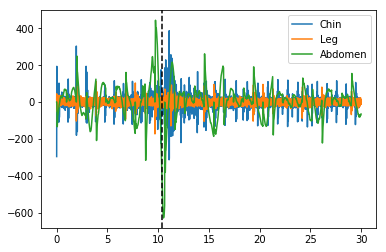

<Figure size 432x288 with 0 Axes>

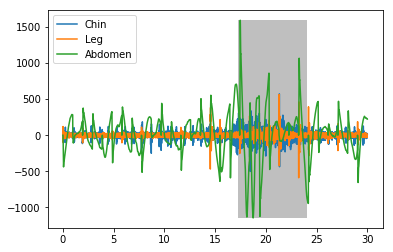

<Figure size 432x288 with 0 Axes>

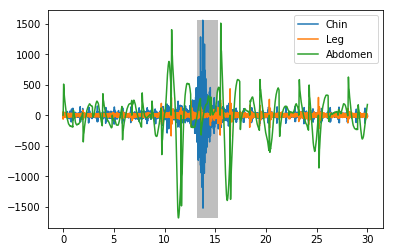

<Figure size 432x288 with 0 Axes>

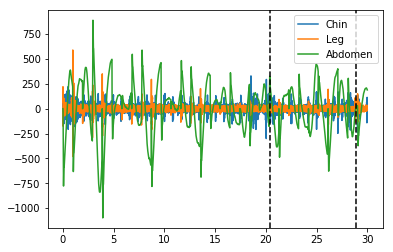

<Figure size 432x288 with 0 Axes>

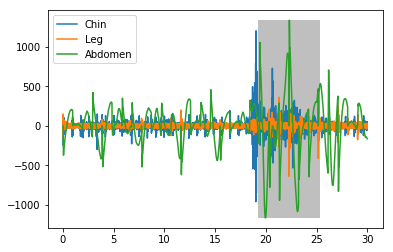

<Figure size 432x288 with 0 Axes>

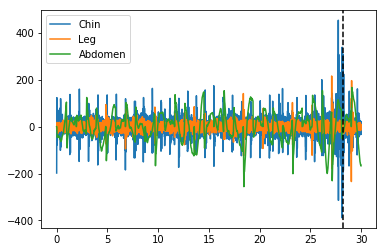

0.2678 minutes elapsed for data creation


<Figure size 432x288 with 0 Axes>

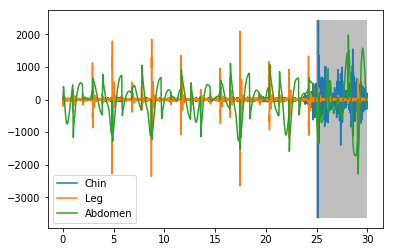

<Figure size 432x288 with 0 Axes>

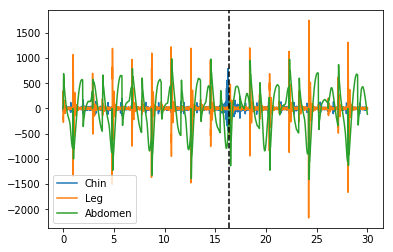

<Figure size 432x288 with 0 Axes>

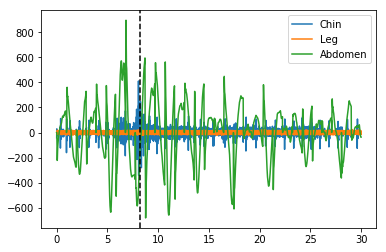

<Figure size 432x288 with 0 Axes>

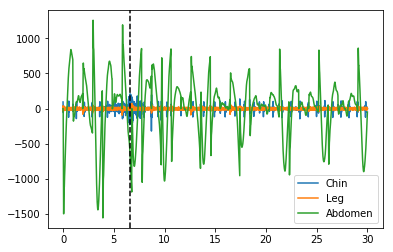

<Figure size 432x288 with 0 Axes>

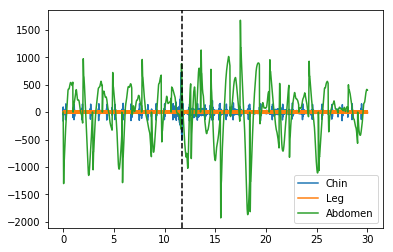

<Figure size 432x288 with 0 Axes>

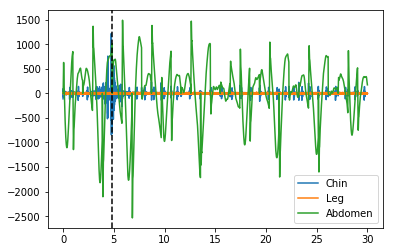

<Figure size 432x288 with 0 Axes>

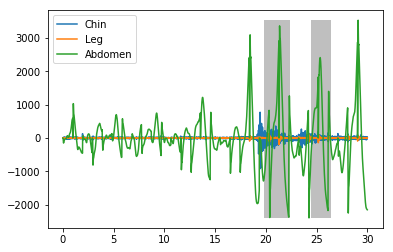

<Figure size 432x288 with 0 Axes>

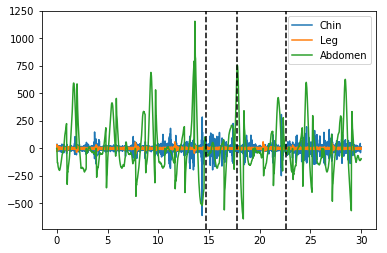

<Figure size 432x288 with 0 Axes>

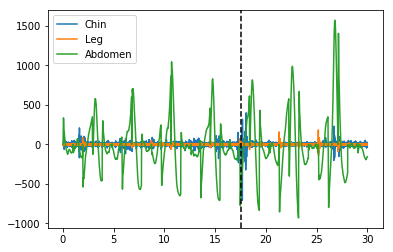

<Figure size 432x288 with 0 Axes>

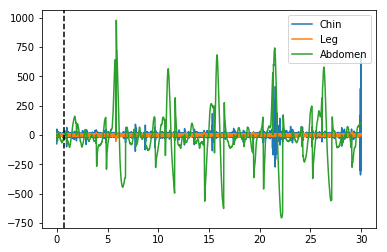

<Figure size 432x288 with 0 Axes>

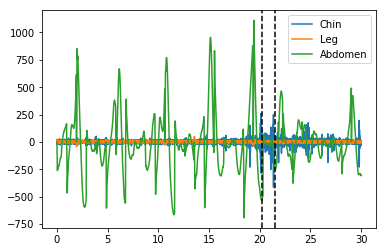

<Figure size 432x288 with 0 Axes>

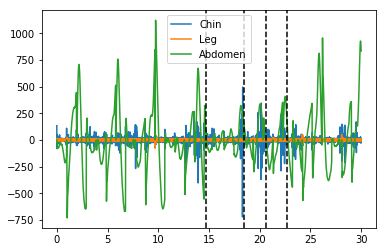

<Figure size 432x288 with 0 Axes>

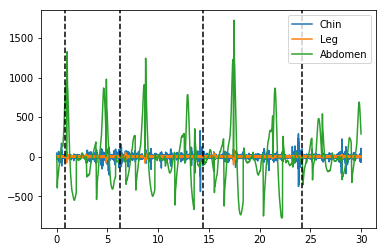

<Figure size 432x288 with 0 Axes>

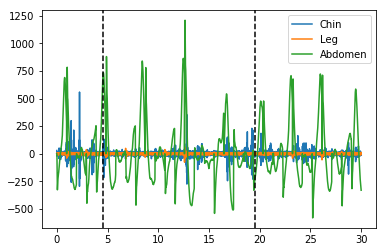

<Figure size 432x288 with 0 Axes>

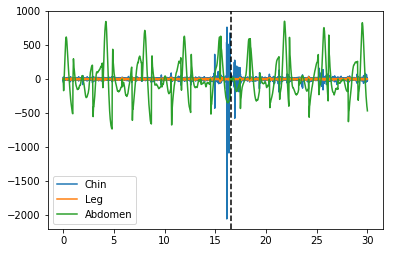

<Figure size 432x288 with 0 Axes>

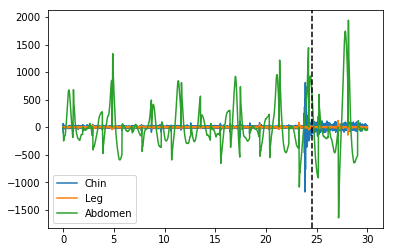

<Figure size 432x288 with 0 Axes>

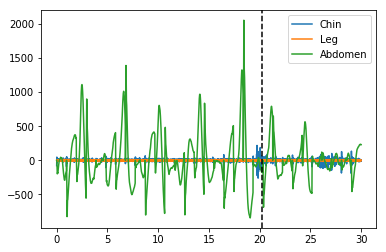

<Figure size 432x288 with 0 Axes>

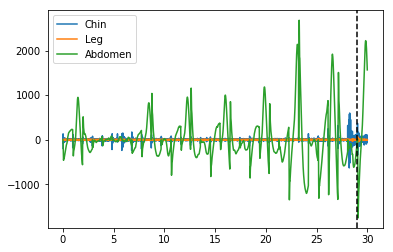

<Figure size 432x288 with 0 Axes>

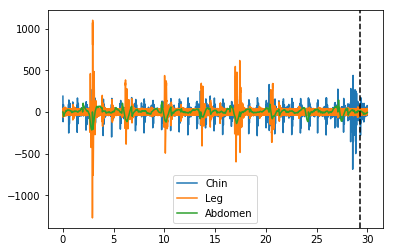

<Figure size 432x288 with 0 Axes>

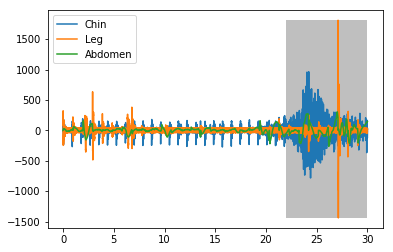

<Figure size 432x288 with 0 Axes>

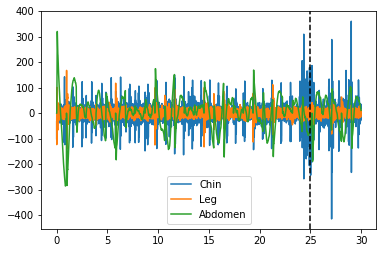

<Figure size 432x288 with 0 Axes>

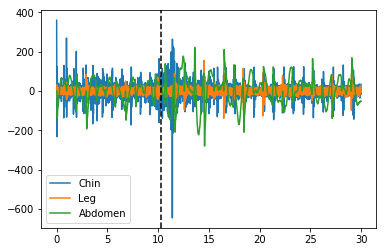

<Figure size 432x288 with 0 Axes>

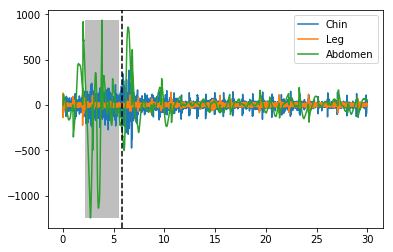

<Figure size 432x288 with 0 Axes>

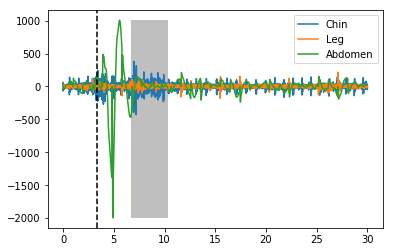

<Figure size 432x288 with 0 Axes>

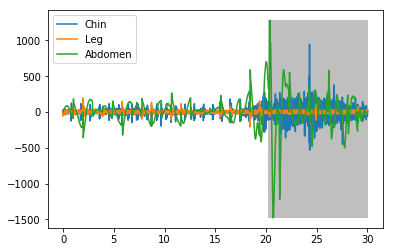

<Figure size 432x288 with 0 Axes>

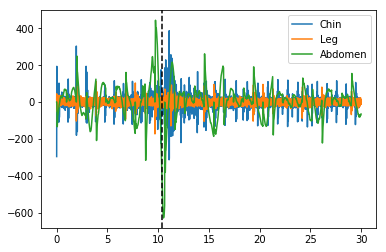

<Figure size 432x288 with 0 Axes>

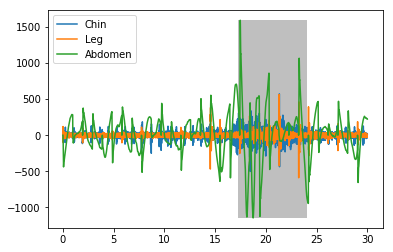

<Figure size 432x288 with 0 Axes>

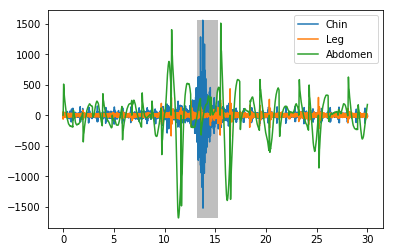

<Figure size 432x288 with 0 Axes>

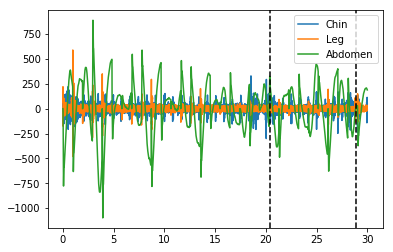

<Figure size 432x288 with 0 Axes>

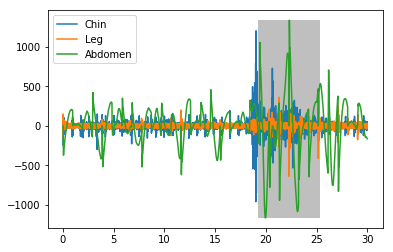

<Figure size 432x288 with 0 Axes>

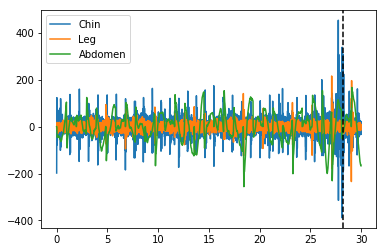

0.2806 minutes elapsed for data creation


<Figure size 432x288 with 0 Axes>

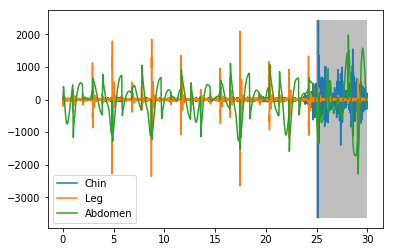

<Figure size 432x288 with 0 Axes>

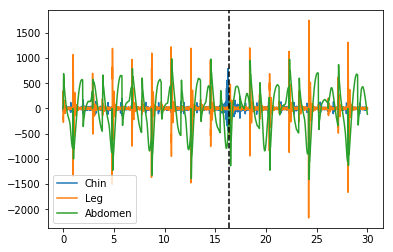

<Figure size 432x288 with 0 Axes>

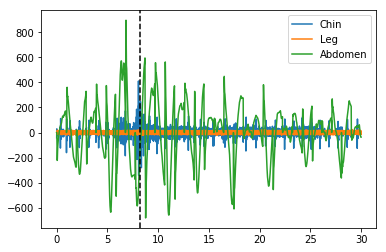

<Figure size 432x288 with 0 Axes>

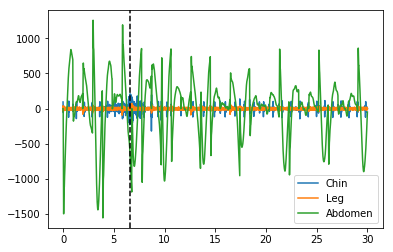

<Figure size 432x288 with 0 Axes>

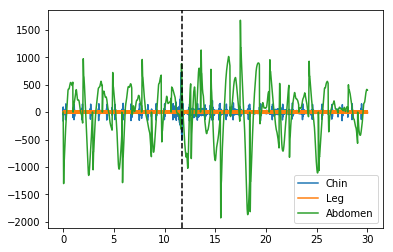

<Figure size 432x288 with 0 Axes>

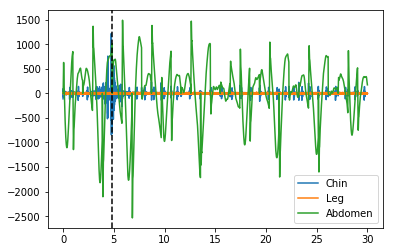

<Figure size 432x288 with 0 Axes>

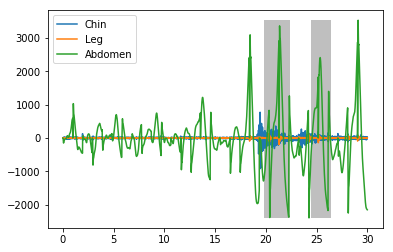

<Figure size 432x288 with 0 Axes>

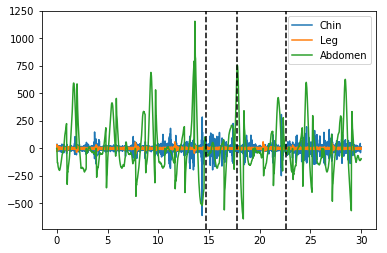

<Figure size 432x288 with 0 Axes>

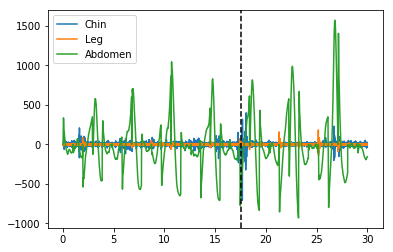

<Figure size 432x288 with 0 Axes>

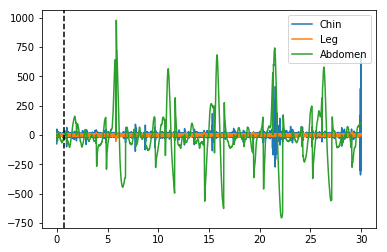

<Figure size 432x288 with 0 Axes>

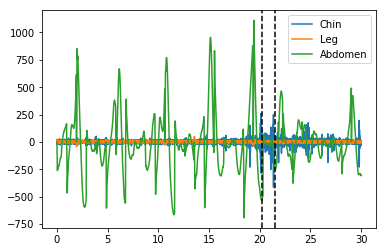

<Figure size 432x288 with 0 Axes>

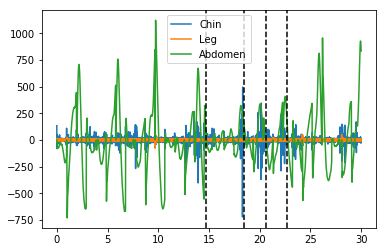

<Figure size 432x288 with 0 Axes>

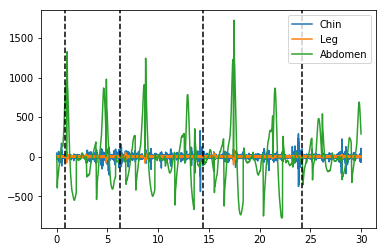

<Figure size 432x288 with 0 Axes>

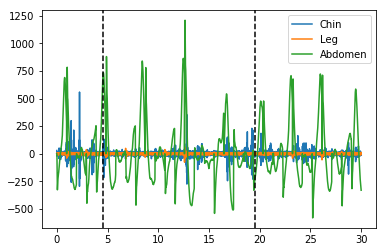

<Figure size 432x288 with 0 Axes>

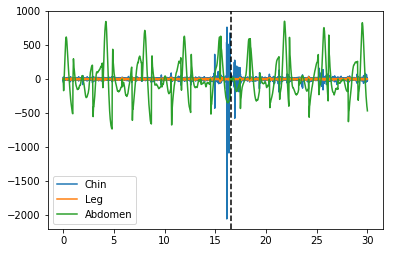

<Figure size 432x288 with 0 Axes>

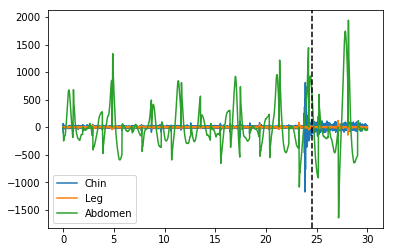

<Figure size 432x288 with 0 Axes>

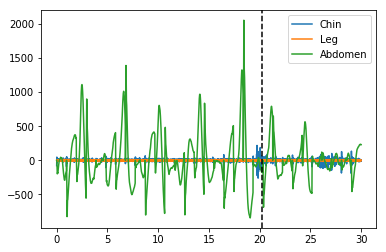

<Figure size 432x288 with 0 Axes>

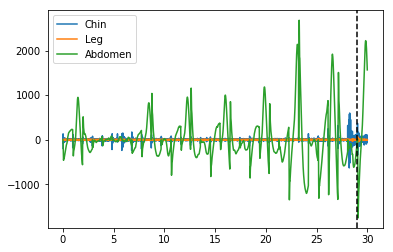

<Figure size 432x288 with 0 Axes>

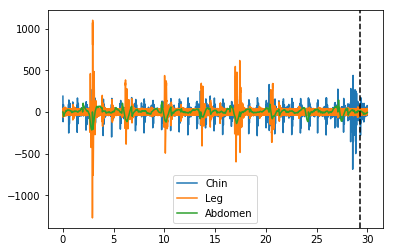

<Figure size 432x288 with 0 Axes>

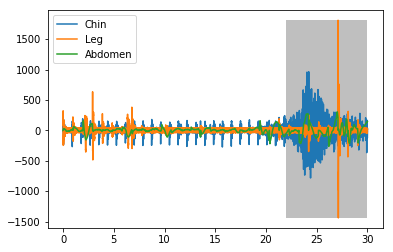

<Figure size 432x288 with 0 Axes>

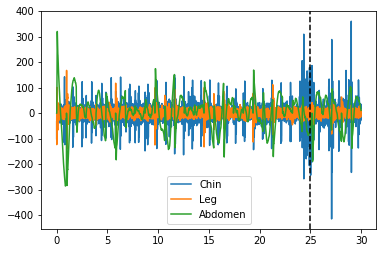

<Figure size 432x288 with 0 Axes>

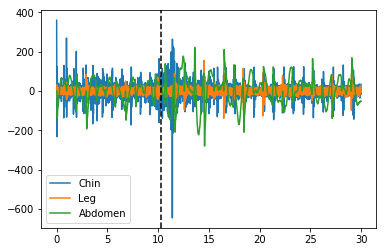

<Figure size 432x288 with 0 Axes>

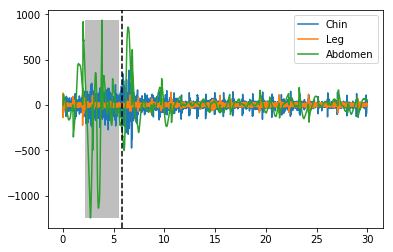

<Figure size 432x288 with 0 Axes>

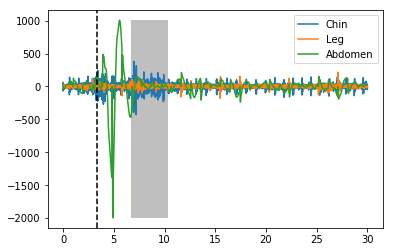

<Figure size 432x288 with 0 Axes>

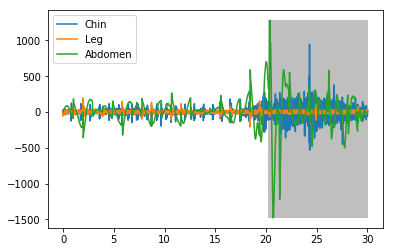

<Figure size 432x288 with 0 Axes>

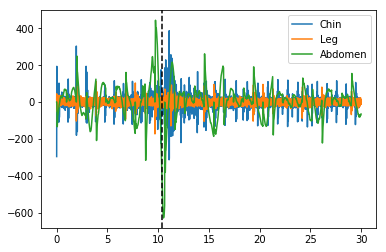

<Figure size 432x288 with 0 Axes>

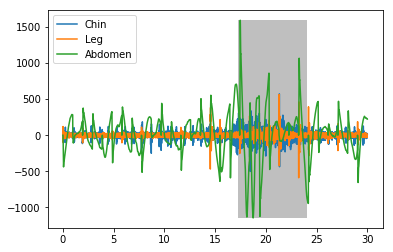

<Figure size 432x288 with 0 Axes>

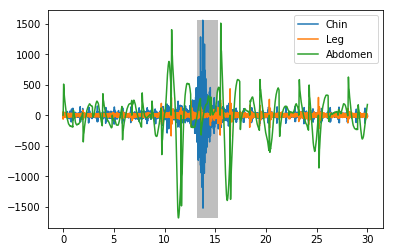

<Figure size 432x288 with 0 Axes>

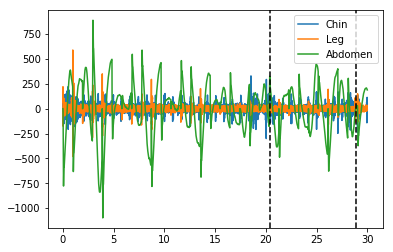

<Figure size 432x288 with 0 Axes>

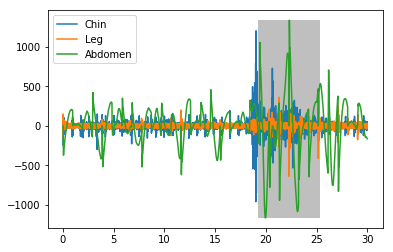

<Figure size 432x288 with 0 Axes>

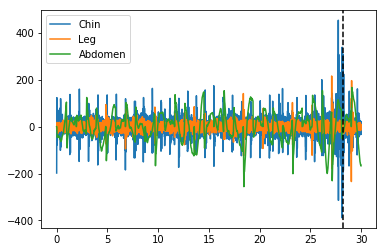

0.2591 minutes elapsed for data creation


In [6]:
## Test
for i in range(3):
    times = []
    files = files_control[:] #+ files_random[:] + files_rswa[:]
    for file in files:
        tstart = time.time()
        file_rec = os.path.join(data_dir, file)
        xdf, signal = load_data(file_rec + xdf_ext, file_rec + data_ext)
        rswa_events = select_rswa_events(signal)
        rswa_epochs = get_epochs(signal,["Chin", "Leg", "Abdomen"], rswa_events, "EpochNumber")
        plot_many_epochs(rswa_epochs, rswa_events)
    time_taken = round(((time.time() - tstart)/60),4)
    times.append(time_taken)
    print(f"{time_taken} minutes elapsed for data creation")
    

In [7]:
print(f"Average time to load data loading individual epochs (instead of bulk load): {sum(times)/len(times)}")

Average time to load data loading individual epochs (instead of bulk load): 0.2591


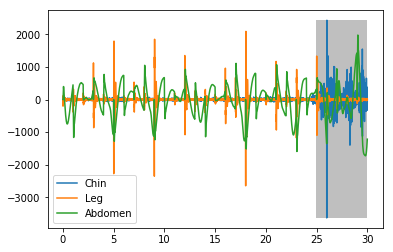

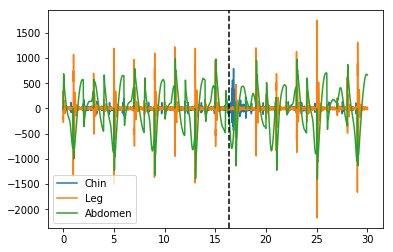

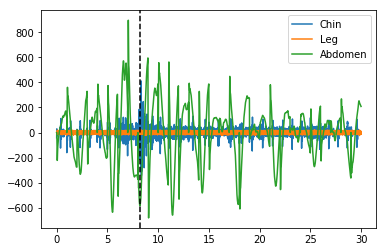

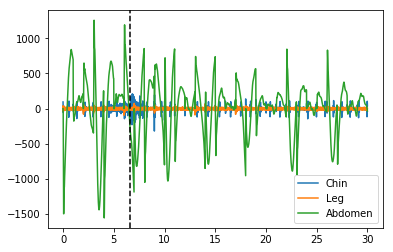

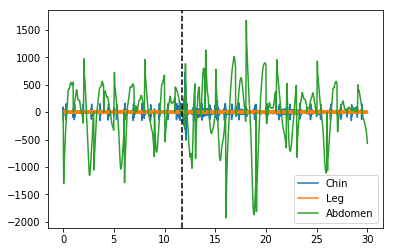

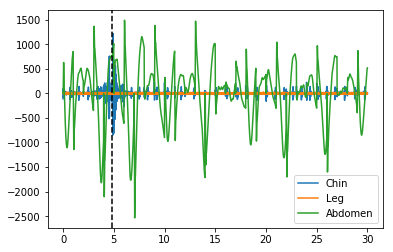

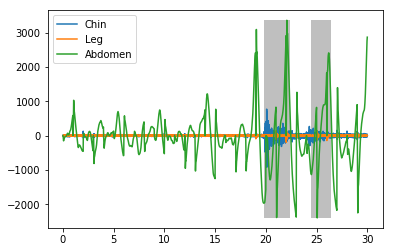

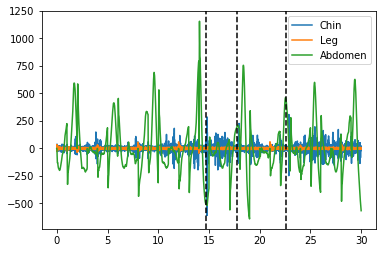

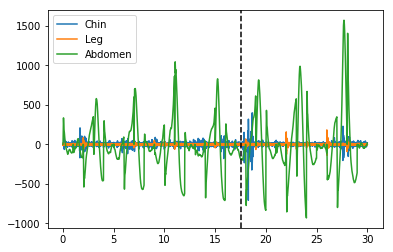

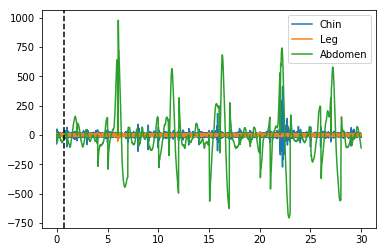

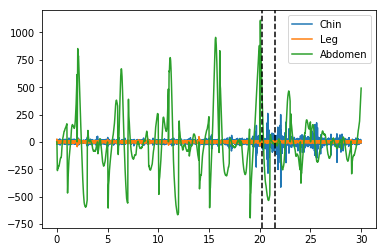

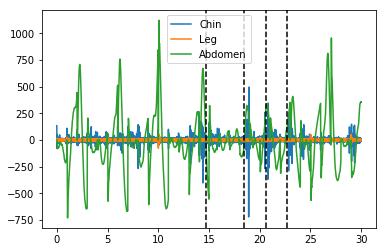

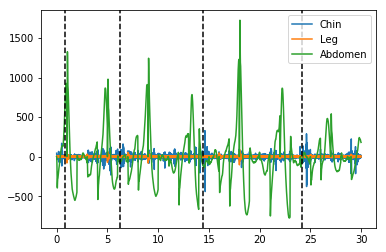

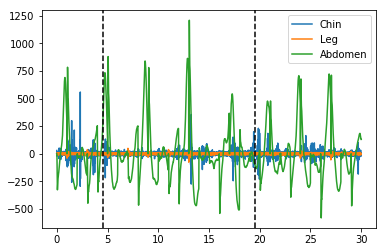

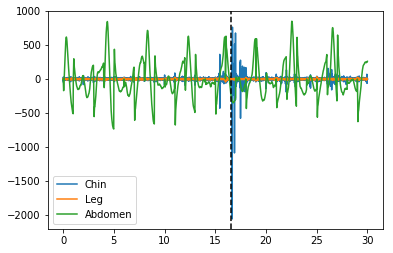

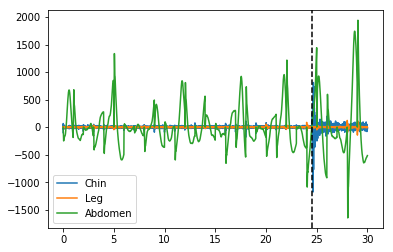

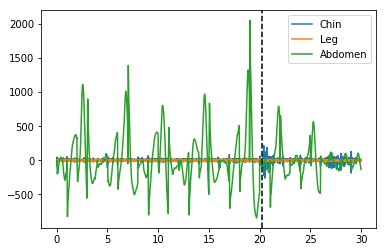

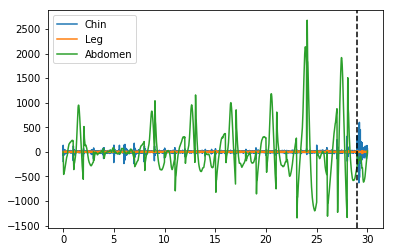

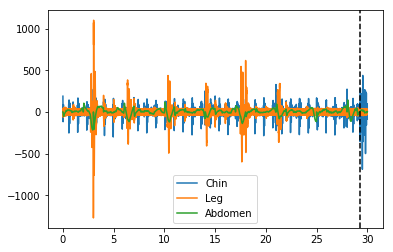

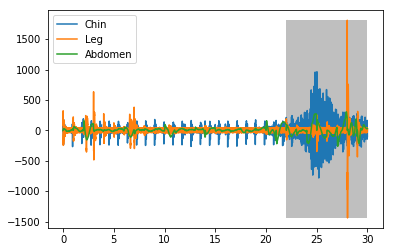

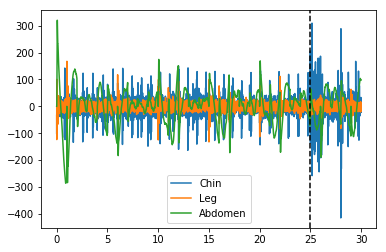

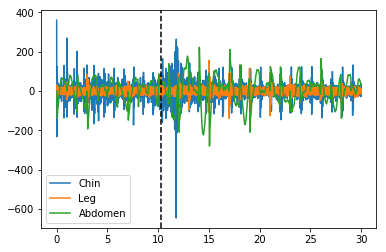

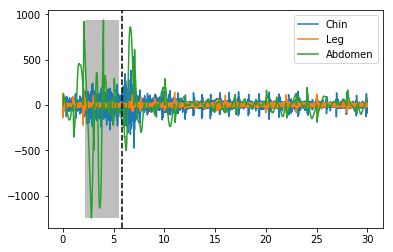

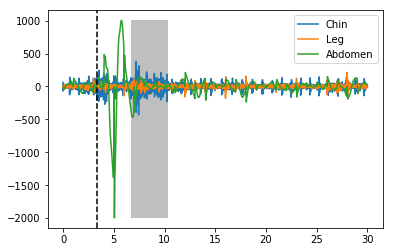

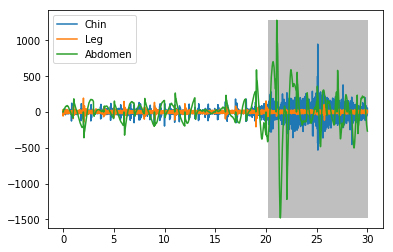

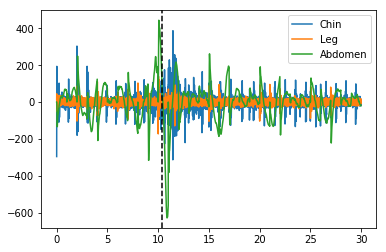

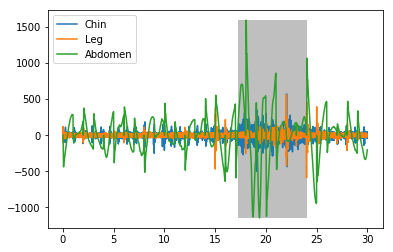

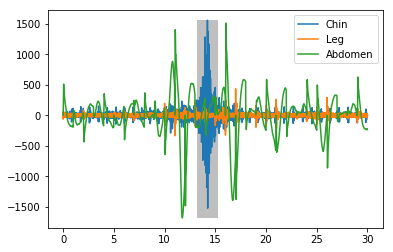

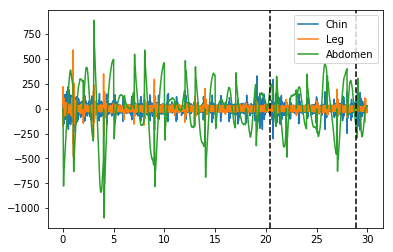

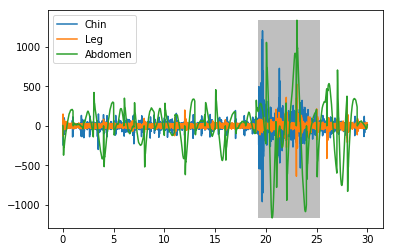

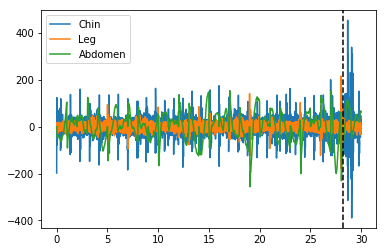

0.3371 minutes elapsed for data creation


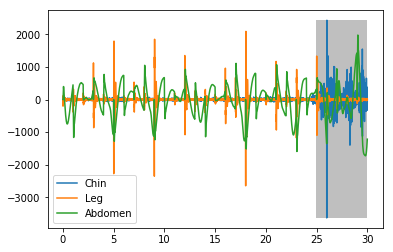

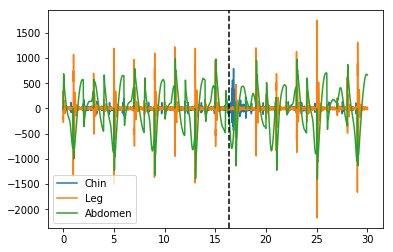

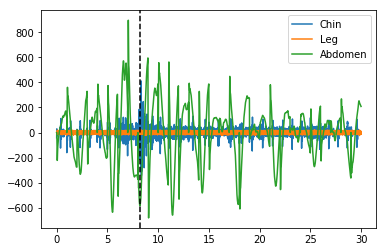

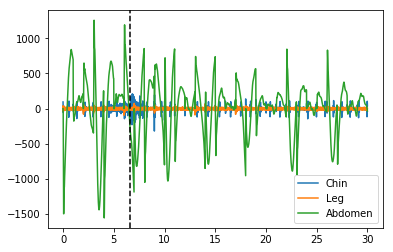

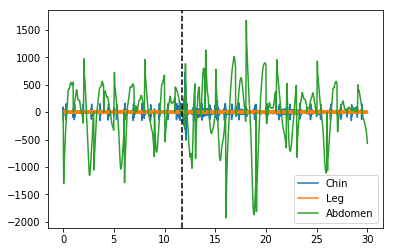

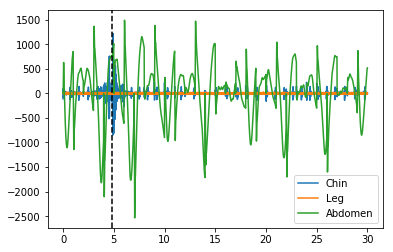

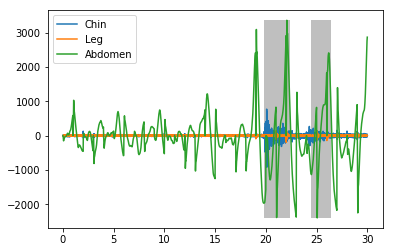

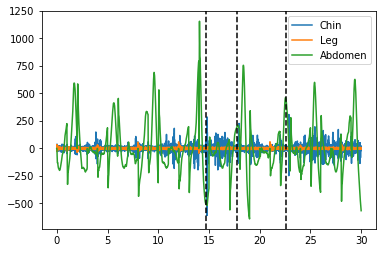

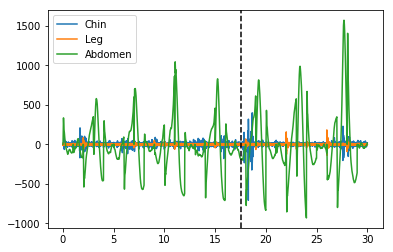

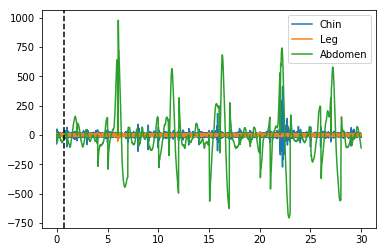

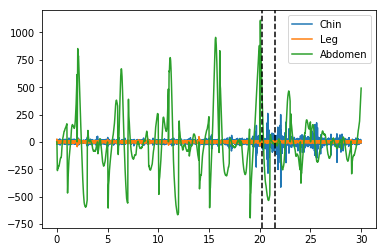

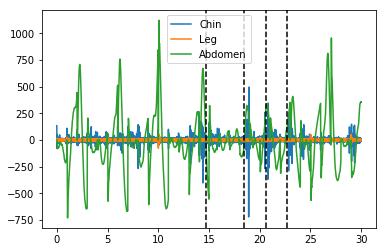

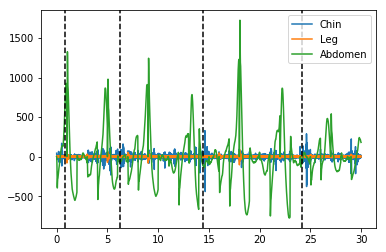

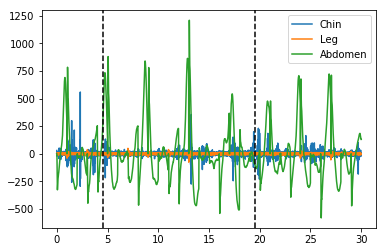

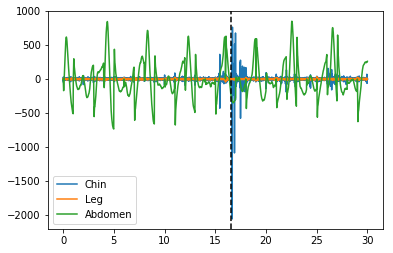

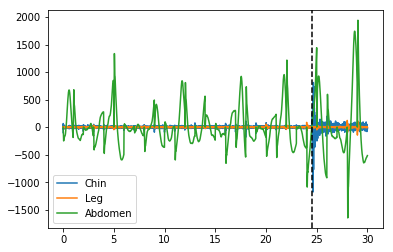

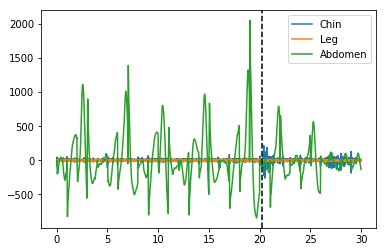

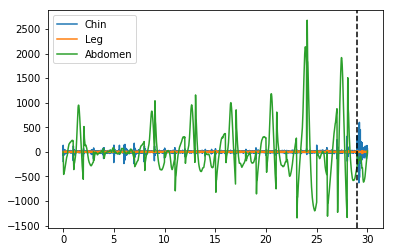

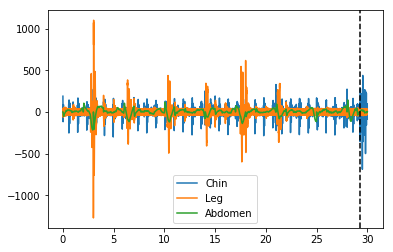

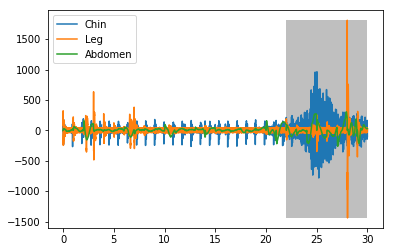

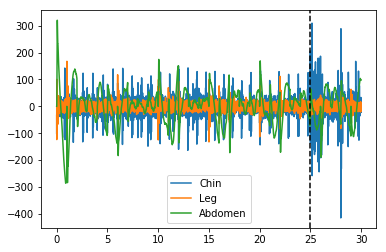

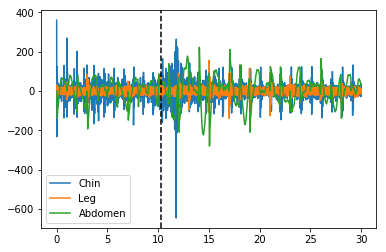

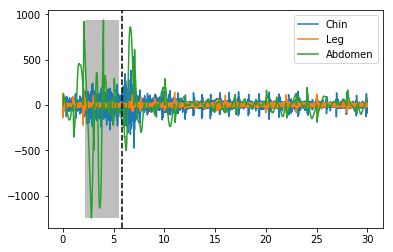

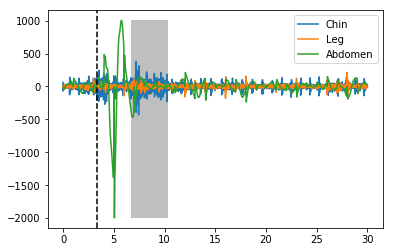

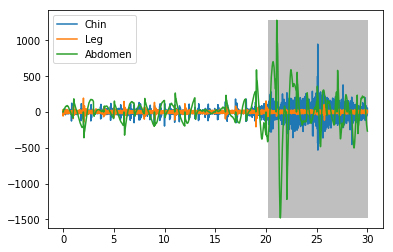

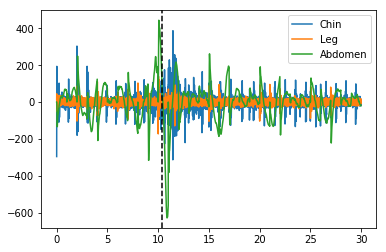

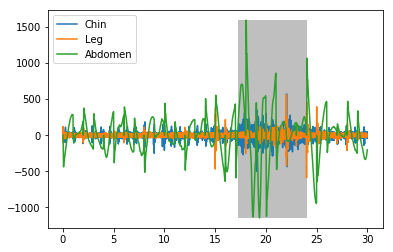

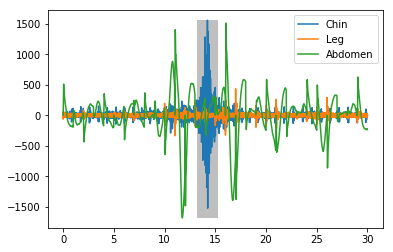

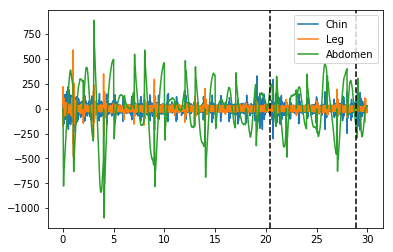

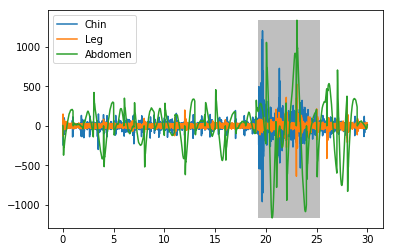

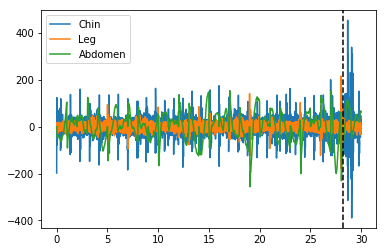

0.3125 minutes elapsed for data creation


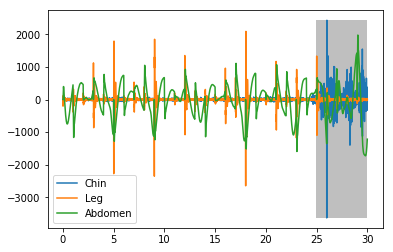

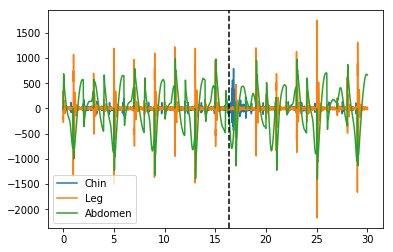

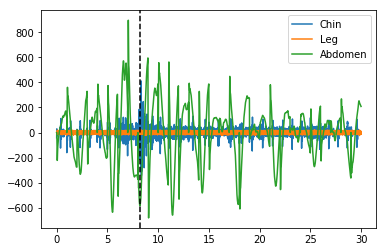

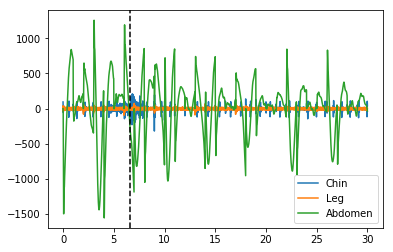

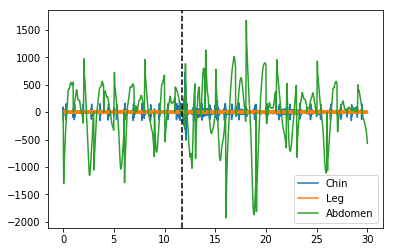

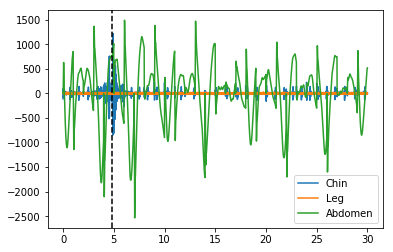

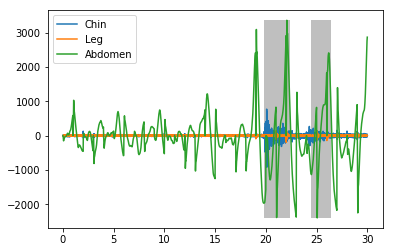

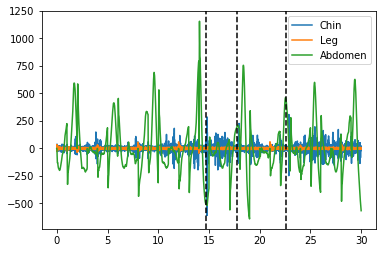

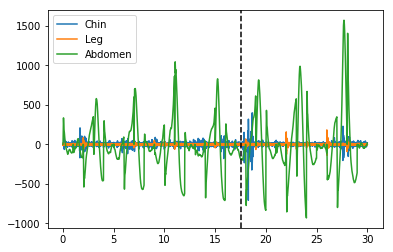

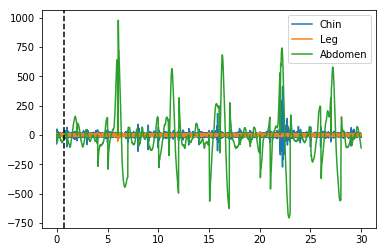

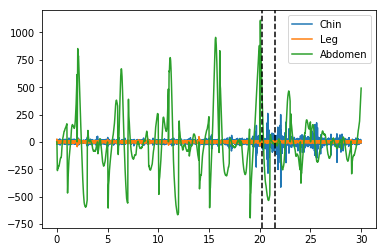

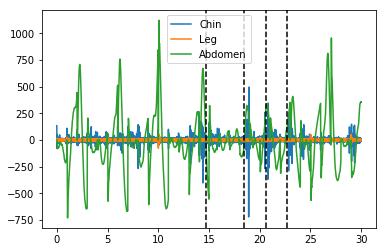

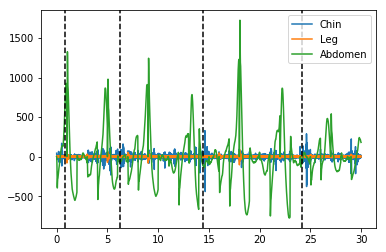

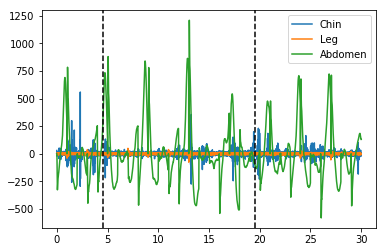

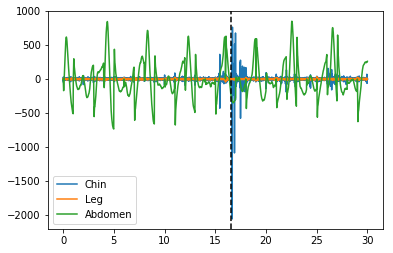

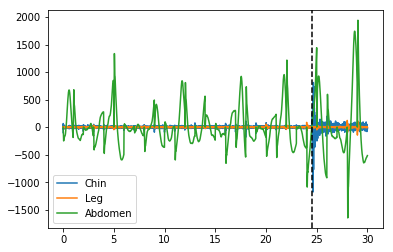

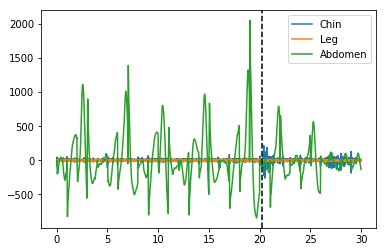

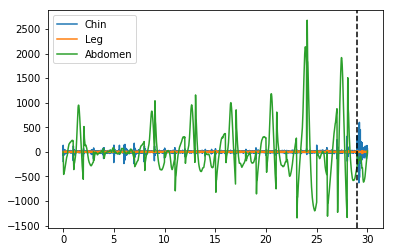

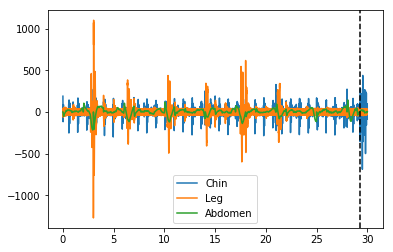

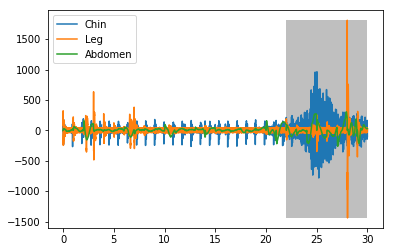

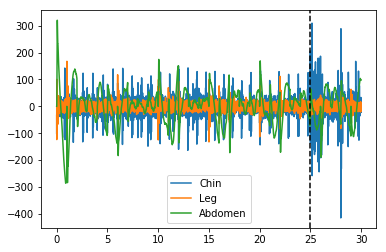

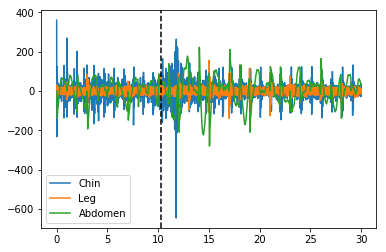

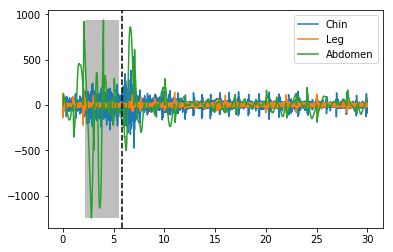

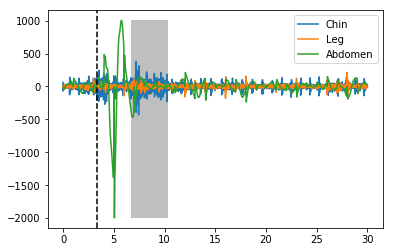

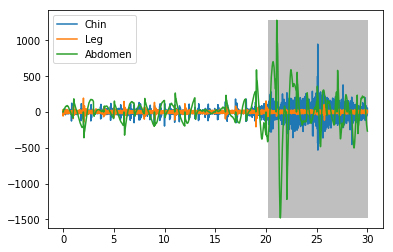

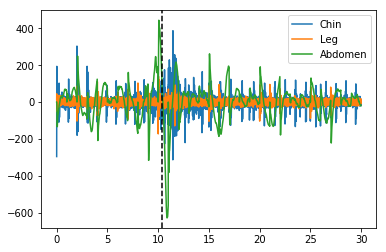

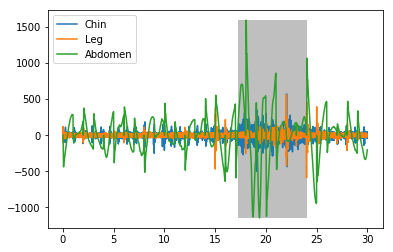

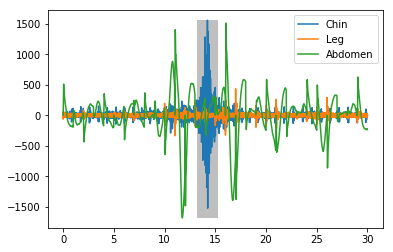

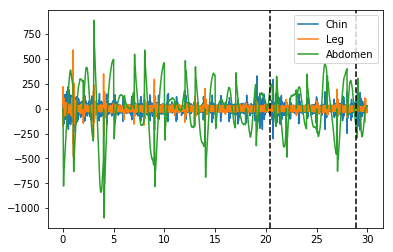

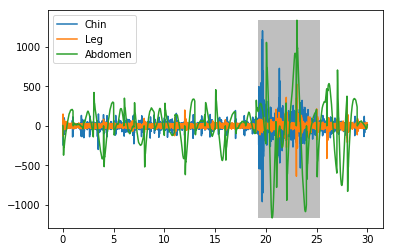

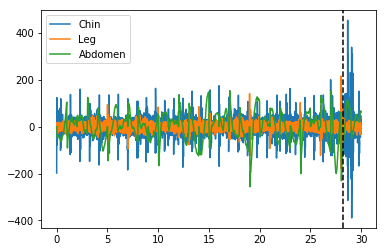

0.3211 minutes elapsed for data creation


In [8]:
for i in range(3):
    files = files_control[:] #+ files_random[:] + files_rswa[:]
    times = []
    for file in files:
        tstart = time.time()
        file_rec = os.path.join(data_dir, file)
        xdf, signal = load_data(file_rec + xdf_ext, file_rec + data_ext)
        channels = signal.read_file(["Chin", "Leg", "Abdomen"],start=0,end=1e9)
        rswa_events = select_rswa_events(signal)
        for event in set(rswa_events["EpochNumber"].values):
            plot_epochO(event, channels, rswa_events)
        times.append(time_taken)
    time_taken = round(((time.time() - tstart)/60),4)
    times.append(time_taken)
    print(f"{time_taken} minutes elapsed for data creation")

In [9]:
print(f"Average time to load data using bulk load from xkamp files: {sum(times)/len(times)}")
    

Average time to load data using bulk load from xkamp files: 0.31393333333333334
